In [4]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_new1 = pd.read_csv('Retail_sales_of_gasoline_monthly_py_inp.csv', parse_dates = True, encoding = "utf_8_sig")

df_new1.Year = pd.to_datetime(df_new1.Year)
df_new1.Year.head()

0   2001-01-01
1   2001-02-01
2   2001-03-01
3   2001-04-01
4   2001-05-01
Name: Year, dtype: datetime64[ns]

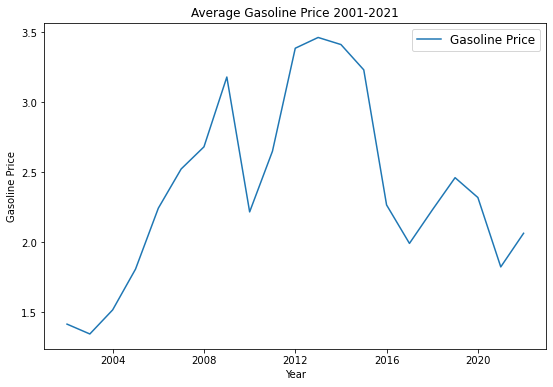

In [5]:
# df_new1
df2 = df_new1.resample('Y', label='right', closed = 'right', on='Year').mean()#sum()
# df2.plot()

df_t = df2.loc['2001-01-01':,]
df_w = pd.DataFrame(columns = ['Gasoline_Price'])
# df_w.Gasoline_Price = np.log(df_t.Gasoline_Price + 1)
# df_w.head()
plt.figure(figsize=(9,6))
plt.xlabel('Year')
plt.ylabel('Gasoline Price')
plt.title('Average Gasoline Price 2001-2021')
plt.plot(df_t, label='Gasoline Price')
plt.legend(fontsize = 12)
plt.show()

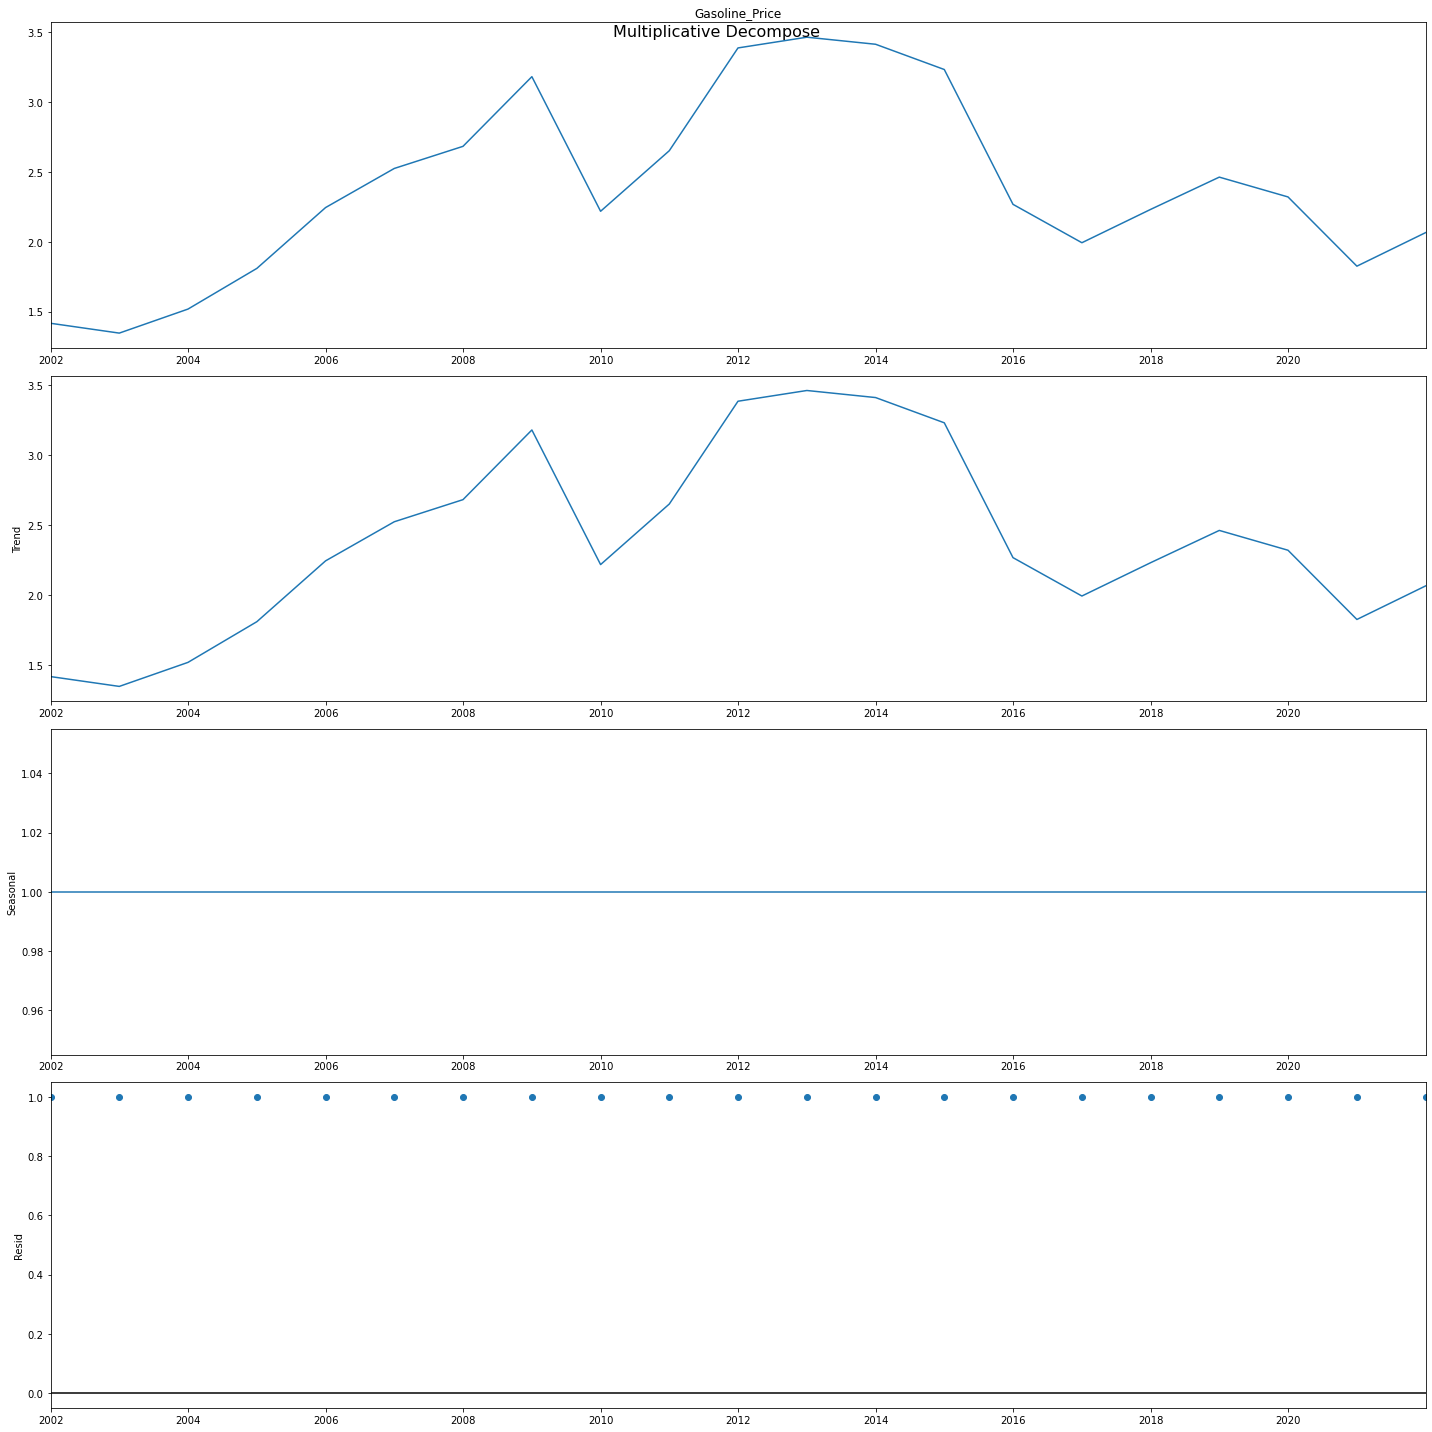

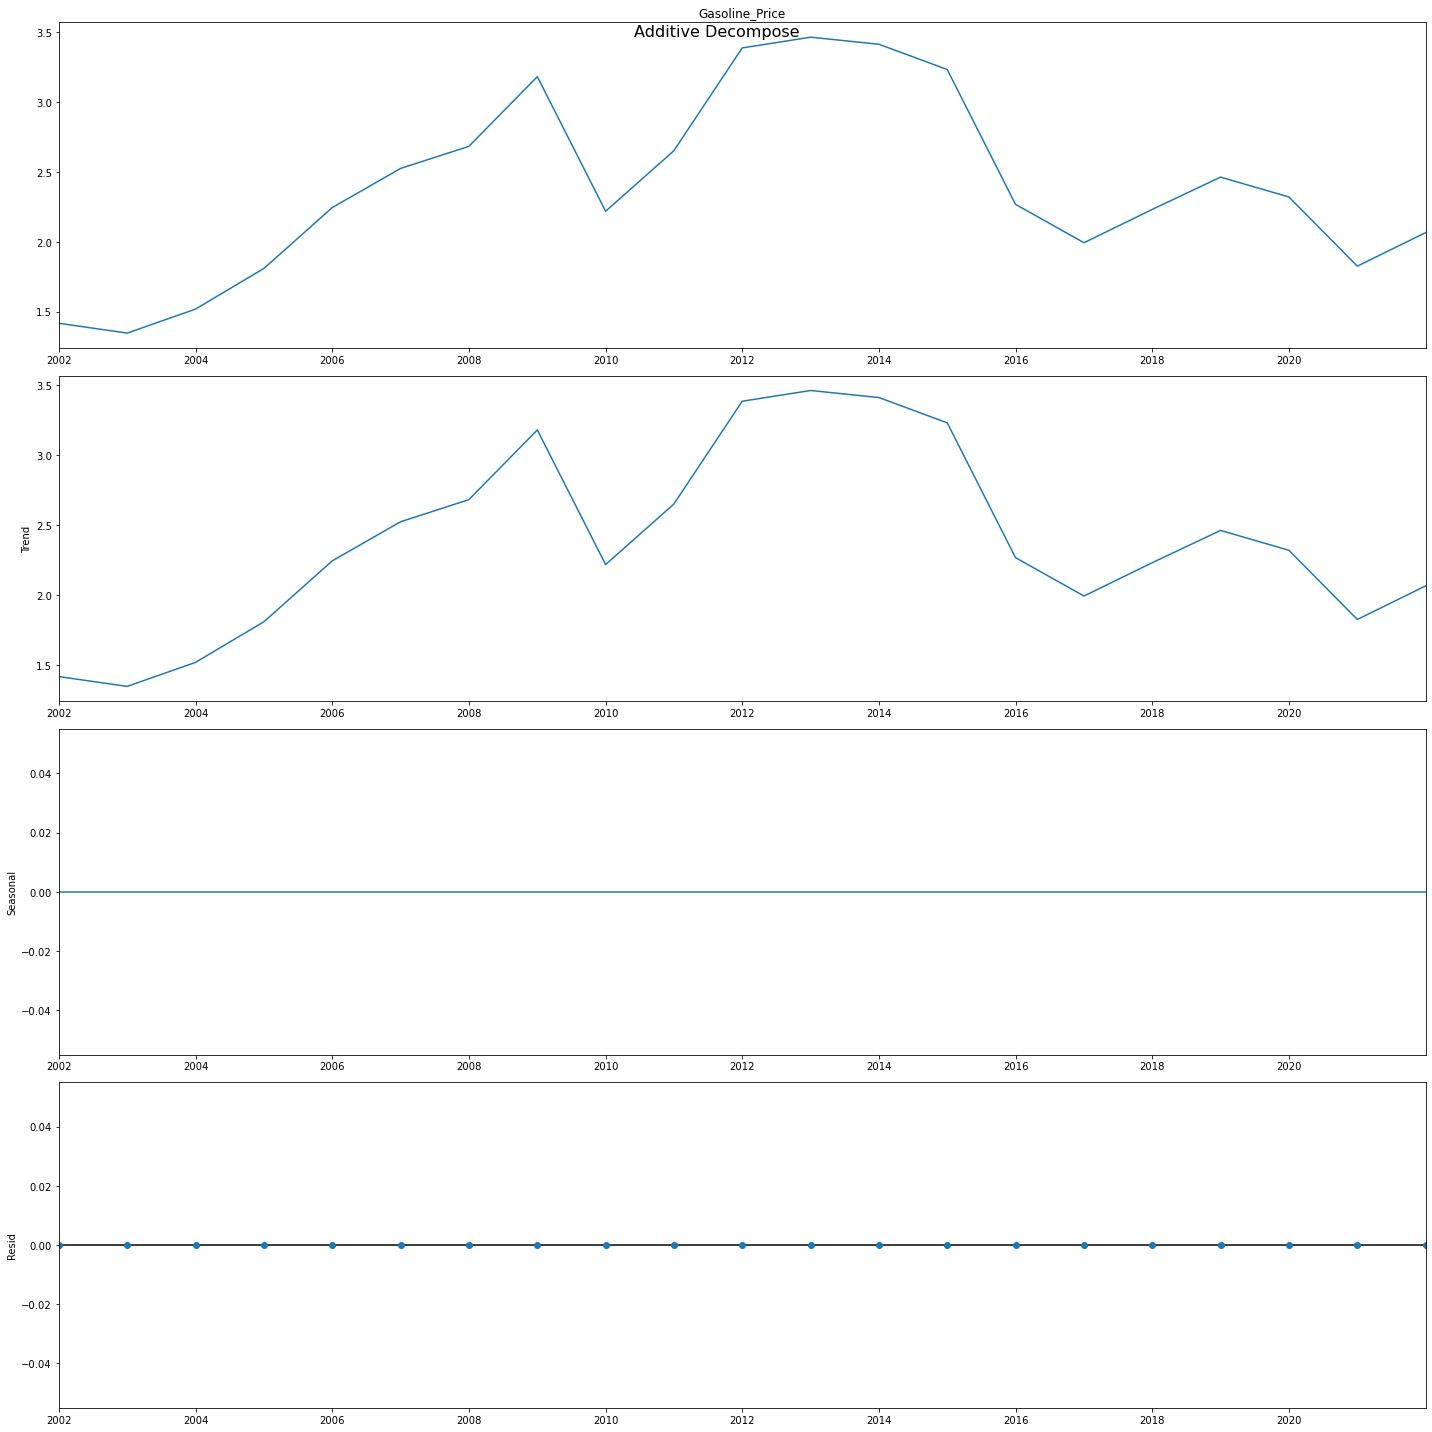

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition
result_mul = seasonal_decompose(df2['Gasoline_Price'], model= 'multiplicative', extrapolate_trend= 'freq')
#Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the 
#beginning of the series.
# Additive Decomposition
result_add = seasonal_decompose(df2['Gasoline_Price'], model= 'additive', extrapolate_trend='freq')
# Plot
plt.rcParams.update({'figure.figsize': (20,20)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16) 
result_add.plot().suptitle('Additive Decompose', fontsize=16) 
plt.show()

In [7]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

from sklearn.metrics import mean_squared_error

series = df2['Gasoline_Price']

historic = series.iloc[:int(len(series) * 0.7)]
test = series.iloc[int(len(series) * 0.7):]

historic = historic.to_list()

predictions = []
for i in range(len(test)):
    sel = ar_select_order(historic, 5, old_names=False)
    sel.ar_lags
    model_fit = sel.model.fit()
    pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
    print(len(historic))
    predictions.append(pred[0])
    historic.append(test[i])
cross_val = pd.Series(predictions, index=test.index)
# print(cross_val)

test_score = mean_squared_error(test, cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(test_score)

14
15
16
17
18
19
20
0.4769792784196878


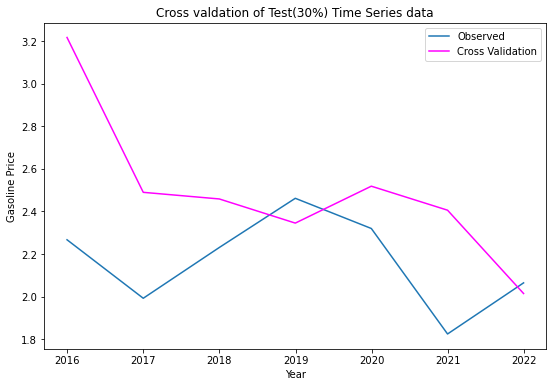

In [8]:
# plot results
plt.figure(figsize=(9,6))
plt.plot(test, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Gasoline Price')
plt.title('Cross valdation of Test(30%) Time Series data')
plt.show()

In [9]:
historic = series
#prediction for the next 5 years
# n_pred = 60
#prediction for the next 5 years
n_pred = 10

#the future weeks starts on 2021-01-01, because the last existing data ends on 2021-01-01
date_pred = pd.date_range("2021-01-01", periods=n_pred, freq="y")

sel = ar_select_order(historic, 5, glob = True, seasonal = False, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)
print(pred)

2022-12-31    2.192832
2023-12-31    2.285189
2024-12-31    2.351916
2025-12-31    2.400125
2026-12-31    2.434956
2027-12-31    2.460121
2028-12-31    2.478302
2029-12-31    2.491438
2030-12-31    2.500928
2031-12-31    2.507785
Freq: A-DEC, dtype: float64


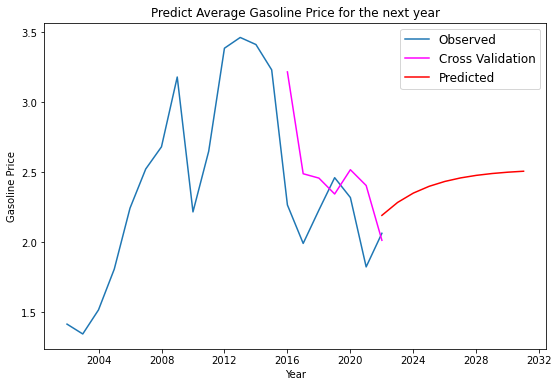

In [10]:
predictions = pd.Series(pred.values, index=date_pred)

# plot results
plt.figure(figsize=(9,6))
plt.xlabel('Year')
plt.ylabel('Gasoline Price')
plt.title('Predict Average Gasoline Price for the next year')
plt.plot(series, label='Observed')
plt.plot(cross_val, color='magenta', label='Cross Validation')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(fontsize = 12)
plt.show()